In [260]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **Прогнозирование количества самоубийств**


##1. Описание задачи


Датасет `master4.csv` позволяет исследователям и аналитикам изучать тенденции в самоубийствах по различным странам и регионам, а также выявлять возможные факторы, влияющие на уровень самоубийств, такие как экономическое положение, возраст и пол. Анализ данных может помочь разработать меры по предотвращению самоубийств и улучшению психического здоровья населения.

Датасет является ценным инструментом для проведения исследований в области общественного здравоохранения, психологии, социологии и экономики.

Данный датасет содержит следующие признаки:
- `country` - название страны
- `year` - год, за который предоставлены данные
- `sex` - пол (мужской/женский)
- `age` - возрастная группа
- `suicides_no` - количество самоубийств
- `population` - численность населения
- `suicides/100k pop` - количество самоубийств на 100 тыс. человек
- `country-year` - комбинированное значение страны и года
- `HDI for year` - индекс человеческого развития для года
- `gdp_for_year ($)`  - ВВП страны за год
- `gdp_per_capita ($)`  - ВВП на душу населения
- `generation` - поколение, к которому относится человек, совершивший самоубийство


##2. Чтение данных

Загрузка данных из интернета:


In [261]:
url = "https://raw.githubusercontent.com/Maria02179/DZ_po_MOAD/main/master4.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(27820, 12)

В текущем наборе данных содержится информация о 27820 наблюдениях, разделённая на  12 признака. Ознакомимся с информацией, хранящейся в нем

In [262]:
data_raw

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,4.Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,2.Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,4.Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,1.G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,3.Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,4.Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,2.Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,6.Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,6.Generation Z


In [263]:
data_raw.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

Подробная информация о столбцах набора данных

In [264]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [265]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


По полученному описанию можно определить наличие пропущенных значений, а так же провести типизацию признаков:
* `sex`, `age` - являются категориальными, номинальными признаками.
* `country` - текстовой признак
* Остальные будут являться количественными (числовыми) признаками.

Однако все категориальные признаки являются по типу `'object'`, исправим это., заменив тип на специальный, предназначенный для хранения категориальных значений: `'category'`

In [266]:
data_raw['sex'] = data_raw['sex'].astype('category')
data_raw['age'] = data_raw['age'].astype('category')
data_raw['generation'] = data_raw['generation'].astype('category')
data_raw['country'] = data_raw['country'].astype('category')

In [267]:
data_raw['sex'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [268]:
data_raw['age'].dtype

CategoricalDtype(categories=['05-14 years', '15-24 years', '25-34 years', '35-54 years',
                  '55-74 years', '75+ years'],
, ordered=False)

In [269]:
data_raw['generation'].dtype

CategoricalDtype(categories=['1.G.I. Generation', '2.Silent', '3.Boomers',
                  '4.Generation X', '5.Millenials', '6.Generation Z'],
, ordered=False)

In [270]:
data_raw['country'].dtype

CategoricalDtype(categories=['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                  'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
                  'Bahrain',
                  ...
                  'Thailand', 'Trinidad and Tobago', 'Turkey', 'Turkmenistan',
                  'Ukraine', 'United Arab Emirates', 'United Kingdom',
                  'United States', 'Uruguay', 'Uzbekistan'],
, ordered=False)

##3. Визуализация данных, вычисление основных характеристик


Выведем описательную статистику по нашему датасету: математическое описание для каждого признака
Сначала рассмотрим категориальные признаки

In [271]:
data_raw.describe(include=['category'])

,country,sex,age,generation
count,27820,27820,27820,27820
unique,101,2,6,6
top,Mauritius,female,15-24 years,4.Generation X
freq,382,13910,4642,6408


* count - количество значений для каждого признака (значения признака Gender отличаются от всех остальных, так как в нем есть пропущенные значения)
* unique - количество уникальных значений
* top - значения, встречающиеся чаще всего
* freq - частота значений top

Теперь посмотрим на данные о количественных признаках

In [272]:
data_raw.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


* count — количество значений для каждого признака
* mean — среднее значение
* std — стандартное отклонение, значение которого показывает, на сколько в среднем отклоняются варианты от среднего значения
* min — минимальное значение
* 25% — значения, которые объект не превышает с вероятностью 25%
* 50% — медиана, то есть значения, которые объект не превышает с вероятностью 25%
* 75% — значения, которые объект не превышает с вероятностью 75%
* max — максимальное значение

Внимательно изучив таблицу можно решить, в каких признaках желательно обработать выбросы.
Считаем необходимым рассмотреть такие признаки, как:
population,	gdp_for_year,	gdp_per_capita
так как их средние и медианные значения ушли далеко от половины максимального значения.

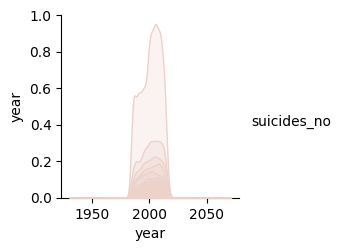

In [273]:
sns.pairplot(data_raw[["year","suicides_no"]], hue="suicides_no")

<Axes: ylabel='year'>

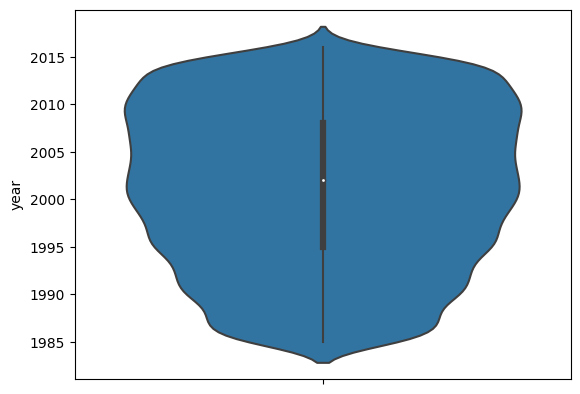

In [274]:
sns.violinplot(y="year", data=data_raw)


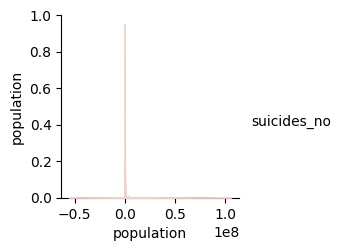

In [275]:
sns.pairplot(data_raw[["population","suicides_no"]], hue="suicides_no")


<Axes: ylabel='population'>

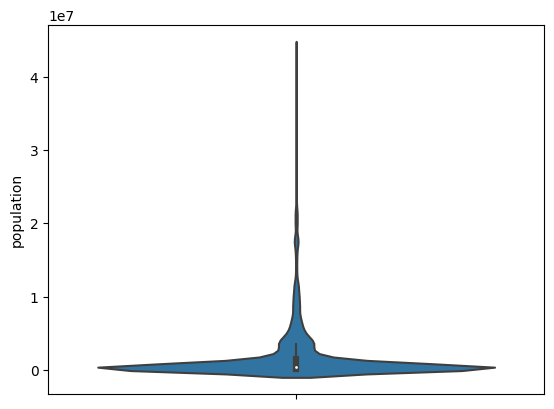

In [276]:
sns.violinplot(y="population", data=data_raw)

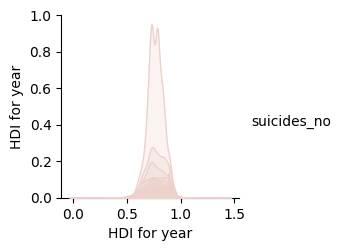

In [277]:
sns.pairplot(data_raw[["HDI for year","suicides_no"]], hue="suicides_no")

<Axes: ylabel='HDI for year'>

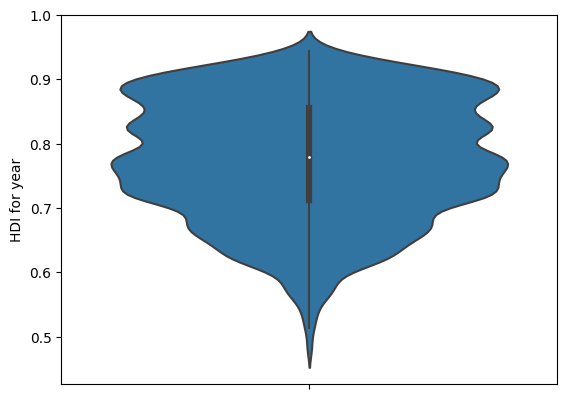

In [278]:
sns.violinplot(y="HDI for year", data=data_raw)

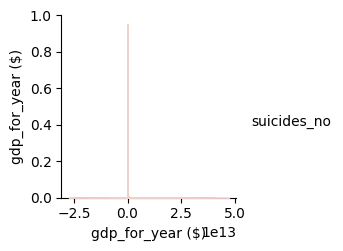

In [279]:
sns.pairplot(data_raw[["gdp_for_year ($)","suicides_no"]], hue="suicides_no")

<Axes: ylabel='gdp_for_year ($)'>

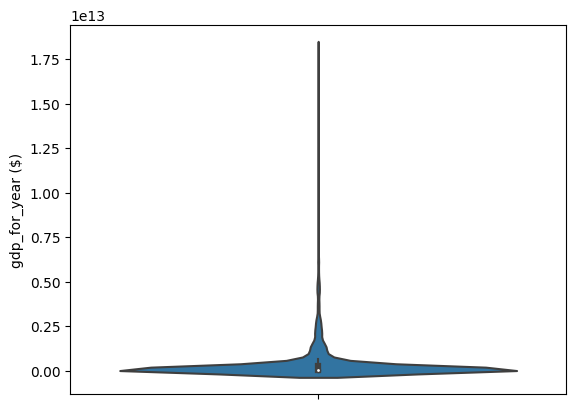

In [280]:
sns.violinplot(y="gdp_for_year ($)", data=data_raw)

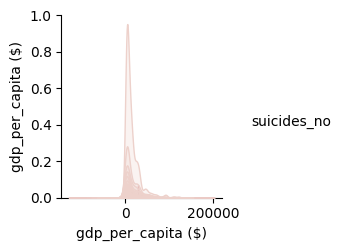

In [281]:
sns.pairplot(data_raw[["gdp_per_capita ($)","suicides_no"]], hue="suicides_no")

<Axes: ylabel='gdp_per_capita ($)'>

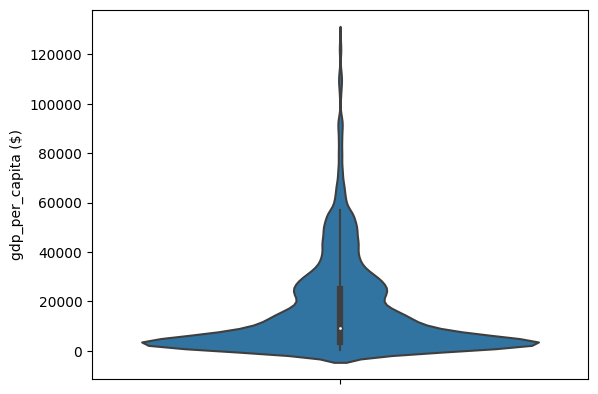

In [282]:
sns.violinplot(y="gdp_per_capita ($)", data=data_raw)

<Axes: ylabel='population'>

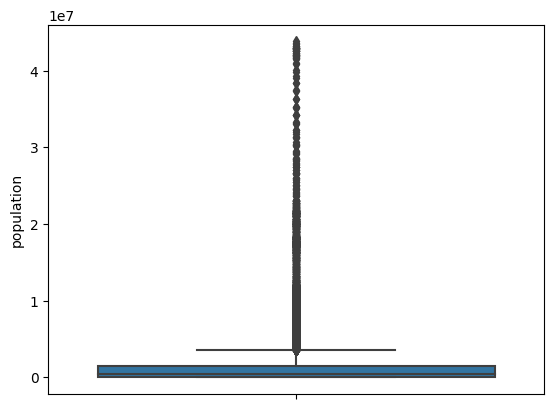

In [283]:
sns.boxplot(y="population", data=data_raw)

<Axes: ylabel='gdp_for_year ($)'>

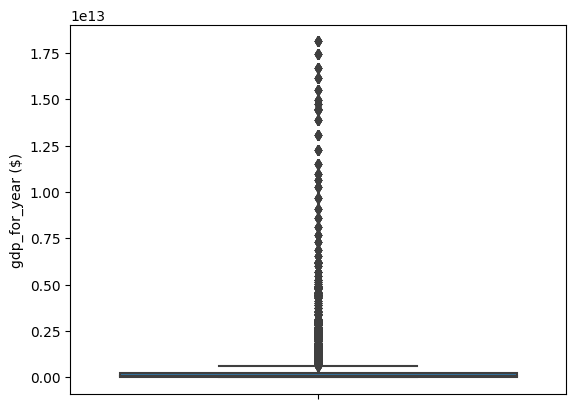

In [284]:

sns.boxplot(y="gdp_for_year ($)", data=data_raw)

<Axes: ylabel='gdp_per_capita ($)'>

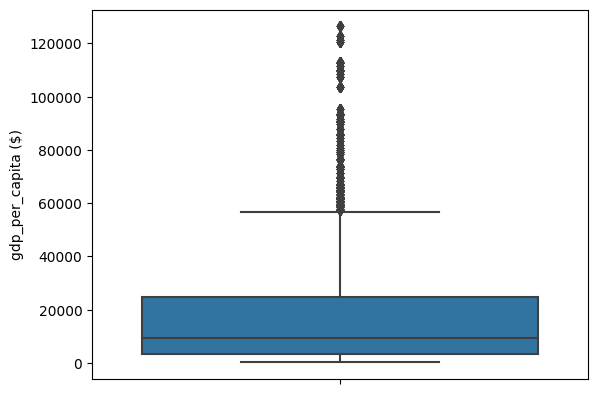

In [285]:
sns.boxplot(y="gdp_per_capita ($)", data=data_raw)

In [286]:
data_raw['suicides_no'].quantile(0.9995)

14183.262000003728

In [287]:
rows_to_drop = data_raw[data_raw['suicides_no'] > data_raw['suicides_no'].quantile(0.95)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)
rows_to_drop = data_raw[data_raw['population'] > data_raw['population'].quantile(0.95)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)
rows_to_drop = data_raw[data_raw['suicides/100k pop'] > data_raw['suicides/100k pop'].quantile(0.995)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)
rows_to_drop = data_raw[data_raw['gdp_for_year ($)'] > data_raw['gdp_for_year ($)'].quantile(0.95)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)
rows_to_drop = data_raw[data_raw['gdp_per_capita ($)'] > data_raw['gdp_per_capita ($)'].quantile(0.9995)].index
len(rows_to_drop)
data_raw = data_raw.drop(rows_to_drop)

<Axes: ylabel='suicides_no'>

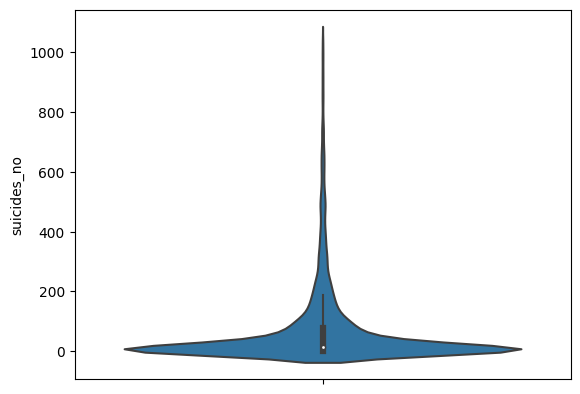

In [288]:
sns.violinplot(y="suicides_no", data=data_raw)

<Axes: ylabel='population'>

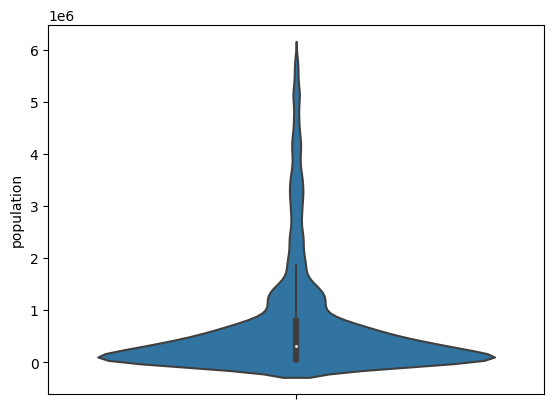

In [289]:
sns.violinplot(y="population", data=data_raw)

<Axes: ylabel='suicides/100k pop'>

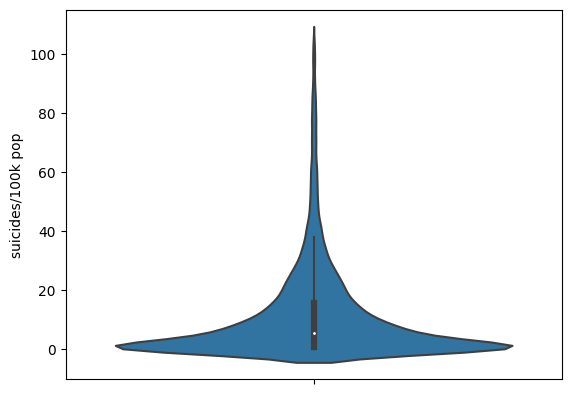

In [290]:
sns.violinplot(y="suicides/100k pop", data=data_raw)

<Axes: ylabel='gdp_for_year ($)'>

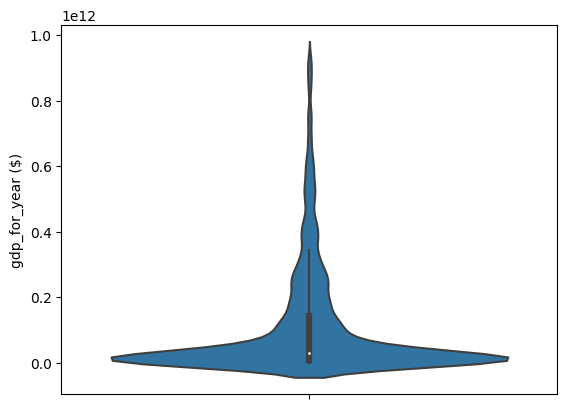

In [291]:
sns.violinplot(y="gdp_for_year ($)", data=data_raw)

<Axes: ylabel='gdp_per_capita ($)'>

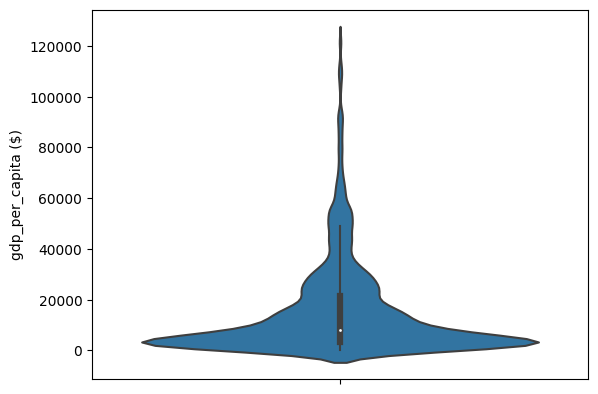

In [292]:
sns.violinplot(y="gdp_per_capita ($)", data=data_raw)

Теперь картина стала намного лучше.

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [293]:
data_raw['age'].value_counts()

75+ years      4034
55-74 years    4009
15-24 years    3993
25-34 years    3985
05-14 years    3968
35-54 years    3735
Name: age, dtype: int64

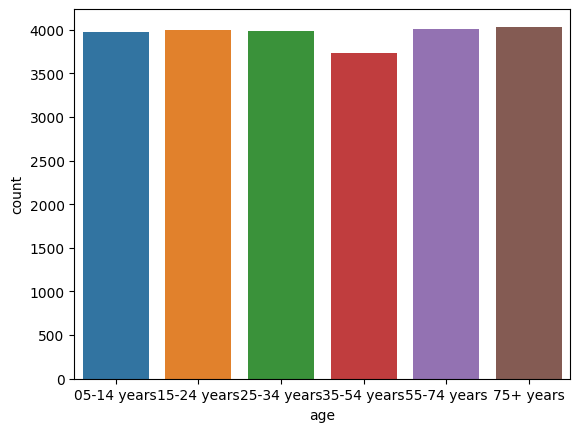

In [294]:
sns.countplot(x='age', data=data_raw)
pass

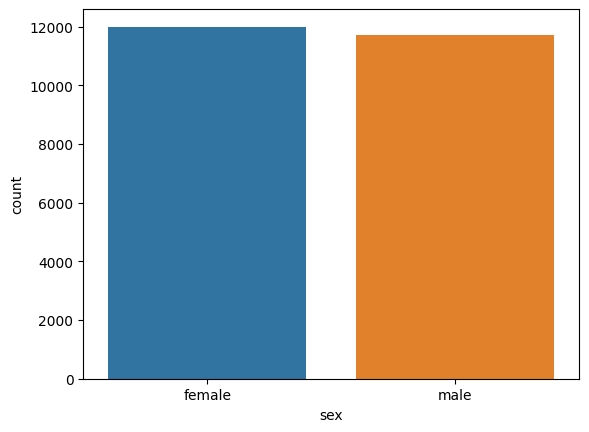

In [295]:
sns.countplot(x='sex', data=data_raw)
pass

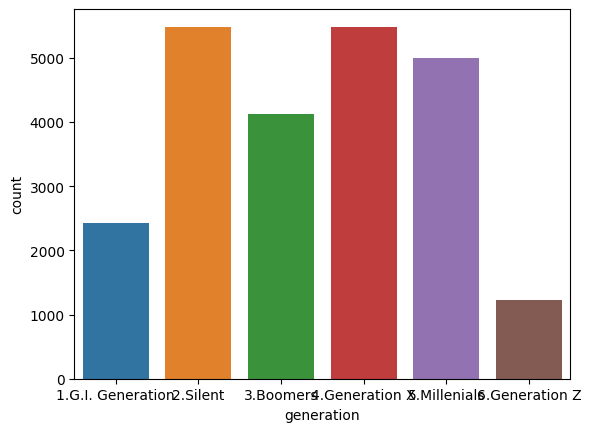

In [296]:
sns.countplot(x='generation', data=data_raw)
pass

Видим что данные не сбалансированные.
Можем посмотреть на соотношение классов более подробно

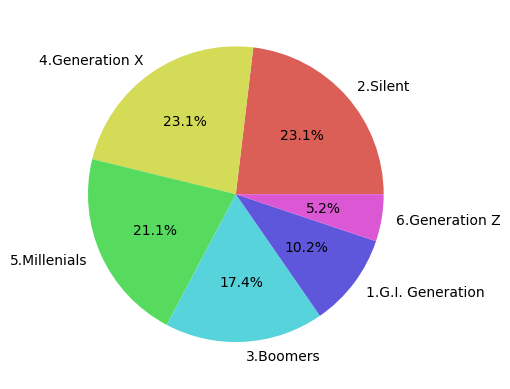

In [297]:
plt.pie(data_raw['generation'].value_counts(), labels = ['2.Silent','4.Generation X' ,'5.Millenials' ,
                  '3.Boomers', '1.G.I. Generation', '6.Generation Z'], colors = sns.color_palette("hls",6), autopct = '%1.1f%%')
pass

Построение диаграммы рассеивания для признаков.

In [ ]:
sns.pairplot(data_raw, hue="generation", palette="turbo")
pass

Выведем матрицу корреляции наших численных признаков:

In [ ]:
corr_mat = data_raw.corr(numeric_only=True)
corr_mat

In [ ]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='seismic')
pass

Поличим список признаков в которых наблюдается корелляция

In [ ]:
import numpy as np
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

Исходя из этих данных заметна высокая, очевидная корреляция:
* между suicides_no, population -  кол-ство самоубийств и кол-ства населения
* между population, gdp_for_year - кол-ства населения и ввп в год
* между HDI for year, gdp_per_capita - индекс человеческого развития в год и ввп на душу населения


In [ ]:
import numpy as np
corr_mat.where(np.triu(corr_mat < -0.5, k=1)).stack()

Большой обратной корреляции не имеется

In [ ]:
data_raw.plot(kind = 'scatter', x = 'population', y = 'suicides_no', alpha=.5)
pass

In [ ]:
data_raw.plot(kind = 'scatter', x = 'HDI for year', y = 'gdp_for_year ($)', alpha=.05)
pass

In [ ]:
data_raw.plot(kind = 'scatter', x = 'HDI for year', y = 'gdp_per_capita ($)', alpha=.05)
pass

In [ ]:
data_raw.drop('suicides/100k pop', axis=1).corrwith(data_raw['suicides/100k pop']).plot(kind='bar', grid=True, figsize=(20, 5));
pass
#year	sex	age	suicides_no	population	suicides/1data_raw.describe()00k pop	country-year	HDI for year	gdp_for_year ($)	gdp_per_capita ($)	generation

In [ ]:
data_raw.describe()

Вероятность самоубийства больше, если население больше и
ввп в год больше


In [ ]:
# Создание трехмерного графика
#population gdp_for_year ($)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('HDI for year')
ax.set_ylabel('population')
ax.set_zlabel('gdp_for_year ($)')
#c = ['r' if val > 70.0  else 'g' for val in data_raw['suicides/100k pop']]
c = ['black' if val < 15.0 else 'y' if  val < 50.0 else 'orange' if val < 100.0 else 'r' if   val < 300.0 else 'darkred' for val in data_raw['suicides_no']]
ax.scatter(data_raw['HDI for year'], data_raw['population'], data_raw['gdp_for_year ($)'], c=c, alpha=1)

# Отображение графика
plt.show()

Получившийся график подтверждает наши утверждения: большое количество населения и большое ввп в год

## 4. Обработка пропущенных значений

Теперь проверим датасет на наличие пропущенных значений:

In [ ]:
data_raw.isnull().sum()

Мы видим столбцы с пропущенными значениями. Можно было бы просто на просто удалить строки с этими ячейками, но их достаточно много.

Поэтому заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам.

In [ ]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

Проверим изменения

In [ ]:
data_raw.isna().sum()

##5. Бинаризация номинальных признаков


Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Заменяем текстовые значения на числовые

In [ ]:
data_raw['country'] = LabelEncoder().fit_transform(data_raw['country'])
data_raw['country-year'] = LabelEncoder().fit_transform(data_raw['country-year'])

In [ ]:
data_raw.head()

Для категориальных (небинарных) признаках 'age', 'sex', 'generation' применим метод *бинаризации* (*one-hot encoding*)

In [ ]:
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data_raw[['age', 'sex', 'generation']])
dummies = pd.DataFrame(enc.transform(data_raw[['age', 'sex', 'generation']]),
                       columns=enc.get_feature_names_out(), index=data_raw.index)

In [ ]:
dummies.head()

Добавим эти dummy-столбцы к таблице и удалим исходные столбцы

In [ ]:
data_raw = pd.concat((data_raw, dummies), axis=1).drop(['age', 'sex', 'generation'], axis=1)

In [ ]:
data_raw.head()

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.
Будем использовать стандартизацию - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению

Выполним стандартизацию всех признаков.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_raw)
data_raw = pd.DataFrame(scaler.transform(data_raw), columns=data_raw.columns, index=data_raw.index)

In [ ]:
data_raw.describe()

##6. Разбить данные на обучающую и тестовую выборки


Для предсказания количества самоубийств будем использовать все входные признаки

In [ ]:
X = data_raw.drop(['suicides/100k pop'], axis=1)
y = data_raw['suicides/100k pop']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

Интерпретируем все значения `y` как целые числа:

In [ ]:
Y_test = Y_test.astype("int")
Y_train = Y_train.astype("int")

## 7. Используем классификатор ближайших соседей (kNN), вычислим ошибки на выборках.

Для начала запустим классификатор к-ближайших соседей с 3 соседями

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

Y_train_predict = model.predict(X_train)
Y_test_predict  = model.predict(X_test)


RMSE_train = mean_squared_error(Y_train, Y_train_predict)**.5
RMSE_test  = mean_squared_error(Y_test,  Y_test_predict)**.5

In [ ]:
RMSE_train, RMSE_test

## 8. Подберем оптимальное значение гиперпараметра (к-ва ближайших соседей)

Рассмотрим различное количество соседей. Наименьшая ошибка покажет нам наилуший выбор параметра k для метода.

In [ ]:
model = KNeighborsClassifier()
error_train = []
error_test = []
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    train_predict = model.predict(X_train)
    test_predict  = model.predict(X_test)
    error_train.append(np.mean(test_predict != Y_test ))
    error_test.append(np.mean(train_predict != Y_train))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_train,linestyle='solid', marker='o')
plt.plot(range(1,10),error_test,linestyle='solid', marker='o')

Лучший результат в 7% достигается при n=2.
Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.

# Общие выводы

В данной работе мы познакомились с датасетом  master4.csv. Выяснили некоторые подробности о взаимосвязи количества населения, ввп в год и иных показателей на количество самоубийств. Нашли и разрешили проблему с наличием пропущенных значений. Провели некоторую подготовку данных: векторизацию категориальных признаков и стандартизацию количественных. Для визуализации данных мы использовали библиотеку seaborn и построили диаграмму violinplot для всех параметров. В результате наша работа позволила успешно обучить модели для предсказания количеств самоубийств и получить хорошие метрики качества. Успешно обучили модели kNN, подобрали наиболее удачное количество соседей, немного поэкспериментировали. Также рассмотрели проблему несбалансированности данных.

# Random Forest

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, Y_train)

err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))

print(err_train, err_test)

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
np.mean(Y_train != Y_train_pred), np.mean(Y_test != Y_test_pred)

# Неглубокая нейронная сеть

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes = (20, 20),
                          solver = 'lbfgs',
                          activation = 'logistic',
                          random_state = 42,
                          max_iter = 1000)
mlp_model.fit(X_train, Y_train)
Y_train_mlp_pred = mlp_model.predict(X_train)
Y_test_mlp_pred = mlp_model.predict(X_test)
print(np.mean(Y_train != Y_train_mlp_pred), np.mean(Y_test != Y_test_mlp_pred))

## Поиск оптимальных значений гиперпараметров для случайного леса

Для этогом метода построим confusing matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

Начнём подбор гиперпараметров с max_depth, который отвечает за максимальную глубину деревьев.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
max_depths = [x for x in range(10,110,10)]
test_error = []
train_error = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, Y_train)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)

    train_error.append(mean_squared_error(Y_train, Y_train_pred))
    test_error.append(mean_squared_error(Y_test, Y_test_pred))

In [ ]:
fig, ax = plt.subplots()

ax.plot(max_depths, train_error, 'b-o', label = 'train')
ax.plot(max_depths, test_error, 'r-o', label = 'test')
ax.set_title('Error vs max_depth')
ax.set_xlabel('max_depth')
ax.set_ylabel('error')
ax.legend()
plt.show()

Смотря на график можно заметить, что при достижении значения max_depth=30 ошибка практически не изменяется. Кроме того, поскольку модель на тренировочной выборке показывает результаты лучше, чем на тестовой, то получаем эффект переобучения.

Вычислим минимальное значение ошибки на тестовой и тренировочной выборках:

In [ ]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print("Минимальное значение ошибки на обучающей выборке: %.2f%%; и на тренировочной выборке: %.2f%%"%(min_test_error,min_train_error))

Далее, будем подбирать гиперпараметр n_estimators, отвечающий за количество деревьев в лесу

In [ ]:
n_estimators_list = [x for x in range(100, 1100, 100)]
test_error = []
train_error = []
for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train, Y_train)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)

    train_error.append(mean_squared_error(Y_train, Y_train_pred))
    test_error.append(mean_squared_error(Y_test, Y_test_pred))

In [ ]:
fig, ax = plt.subplots()

ax.plot(n_estimators_list, train_error, 'b-o', label = 'train')
ax.plot(n_estimators_list, test_error, 'r-o', label = 'test')
#ax.set_xlim([np.min(max_depths), np.max(max_depths)])
ax.set_title('Error vs n_estimators')
ax.set_xlabel('n_estimators')
ax.set_ylabel('error')
ax.legend()
plt.show()

In [ ]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print("Минимальное значение ошибки на обучающей выборке: %.2f%%; и на тренировочной выборке: %.2f%%"%(min_test_error,min_train_error))

Оптимальное значение n_estimators:

In [ ]:
n_estimators_opt = n_estimators_list[test_error.index(min_test_error)]
print(n_estimators_opt)

Теперь проведём запуск метода случайных деревьев с подобранными оптимальными гиперпараметрами: max_depth=60, n_estimators = 200;

In [ ]:
rf = RandomForestClassifier(max_depth=60, n_estimators = 200)
rf.fit(X_train, Y_train)

Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

In [ ]:
print("ошибка на обучающей выборке: %.2f%%; и ошибка на тренировочной: %.2f%%"%(mean_squared_error(Y_train, Y_train_pred) * 100, mean_squared_error(Y_test, Y_test_pred) * 100))